In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = '''p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3'''


In [3]:
TEST_HEIGHT = 7
TEST_WIDTH = 11

def parse(s):
    return np.fromiter(map(int, re.findall(r'[-]?\d+', s)), dtype=int).reshape([-1,2,2])

def move(robots, time, w, h):
    '''careful -- mutates robots'''
    robots[:, 0] += robots[:, 1] * time
    robots[:, 0] %= [w, h]

def plot(robots, w, h):
    grid = [['.'] * w for _ in range(h)]    
    for r, v in robots:
        x, y, = r
        grid[y][x]
        if grid[y][x] == '.':
             grid[y][x] = 1
        else:
            grid[y][x] += 1 

    for line in grid:
        print(''.join(map(str,line)))

def safety(robots, w, h):
    x_mid = w // 2
    y_mid = h // 2
    ne = (robots[:,0, 0] > x_mid) & (robots[:,0, 1] < y_mid)
    sw = (robots[:,0, 0] < x_mid) & (robots[:,0, 1] > y_mid)
    nw = (robots[:,0, 0] < x_mid) & (robots[:,0, 1] < y_mid)
    se = (robots[:,0, 0] > x_mid) & (robots[:,0, 1] > y_mid)
    return sum(nw) * sum(sw) * sum(ne) * sum(se)


In [4]:
single = '2,4 v=2,-3'
single_robot = parse(single)

plot(single_robot, TEST_WIDTH, TEST_HEIGHT)

for t in range(5):
    print()
    move(single_robot, 1, TEST_WIDTH, TEST_HEIGHT)
    plot(single_robot, TEST_WIDTH, TEST_HEIGHT)


...........
...........
...........
...........
..1........
...........
...........

...........
....1......
...........
...........
...........
...........
...........

...........
...........
...........
...........
...........
......1....
...........

...........
...........
........1..
...........
...........
...........
...........

...........
...........
...........
...........
...........
...........
..........1

...........
...........
...........
.1.........
...........
...........
...........


In [5]:
test_robots = parse(s)
move(test_robots, 100, TEST_WIDTH, TEST_HEIGHT)
plot(test_robots, TEST_WIDTH, TEST_HEIGHT)

safety(test_robots, TEST_WIDTH, TEST_HEIGHT)

......2..1.
...........
1..........
.11........
.....1.....
...12......
.1....1....


12

In [6]:
WIDTH = 101
HEIGHT = 103

with open('input_files/14.txt') as f:
    raw = f.read()

robots = parse(raw)
move(robots, 100, WIDTH, HEIGHT)
safety(robots, WIDTH, HEIGHT)


217132650

## Part Two

This was basically a lot of guess and check. Things that didn't work:

- Assuming a tree shape would be symmetrical and/or bottom eeighted and then comparing the quadrants.
- Assuming a tree shape would fill the middle column.
- Assuming there would be ornaments where an unsual number of robots occupied the same coordinate.
- Assuming there would be emptry spaces in the top corners, becuase, you knwo, chistrmas tree shape.

Last effort was looking for an unusual number in the center. 235 was arrived at by gradually increasing the threashold. It only took a few tries.

In [7]:
def draw(robots, w, h):
    pic = np.zeros([h, w])
    np.add.at(pic, (robots[:,0, 1], robots[:,0, 0]), 1)
    return pic


def quad_count(robots, w, h):
    x_mid = w // 2
    y_mid = h // 2
    ne = (robots[:,0, 0] > x_mid) & (robots[:,0, 1] < y_mid)
    sw = (robots[:,0, 0] < x_mid) & (robots[:,0, 1] > y_mid)
    nw = (robots[:,0, 0] < x_mid) & (robots[:,0, 1] < y_mid)
    se = (robots[:,0, 0] > x_mid) & (robots[:,0, 1] > y_mid)
    return sum(nw),  sum(ne), sum(sw), sum(se)

def mid_count(robots, w, h):
    x_mid = w // 4
    y_mid = h // 4
    mid = (robots[:,0, 0] > (x_mid)) & (robots[:,0, 0] < (h - x_mid )) & (robots[:,0, 1] > (y_mid)) & (robots[:,0, 1] < (w - y_mid ))
    return sum(mid)


In [12]:
count = 0
robots = parse(raw)

In [19]:
while True:
    count += 1
    if count % 10000 == 0:
        print(count)
    move(robots, 1, WIDTH, HEIGHT)
    if mid_count(robots, WIDTH, HEIGHT) > 235:
        print(count)
        break 

6516


368


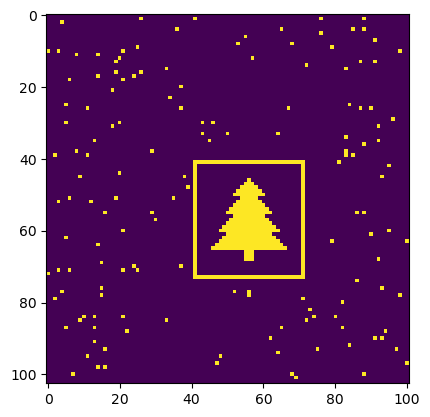

In [20]:
print(mid_count(robots, WIDTH, HEIGHT))
plt.imshow(draw(robots, WIDTH, HEIGHT));

In [31]:
import numpy as np
from scipy.linalg import svd

robots = parse(raw)
# Example: List of image matrices

singular_values =[]
for i in range(10000):
    move(robots, 1, WIDTH, HEIGHT)
    singular_values.append(svd(draw(robots, WIDTH, HEIGHT), compute_uv=False))

# Compute signal-to-noise metric (e.g., first singular value / total singular values)
signal_strength = [sv[0] / np.sum(sv) for sv in singular_values]

# Identify image with strongest signal
best_image_index = np.argmax(signal_strength)
best_image_index + 1

6516

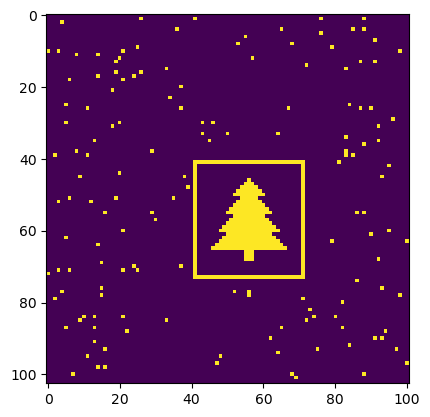

In [34]:
robots = parse(raw)

move(robots, 6516, WIDTH, HEIGHT)
plt.imshow(draw(robots, WIDTH, HEIGHT));

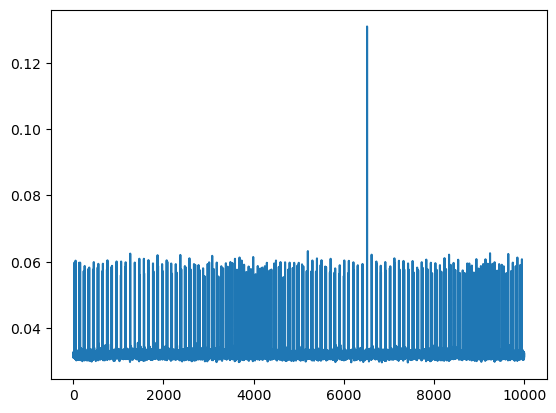

In [30]:
plt.plot(signal_strength)

In [74]:
robots = parse(raw)
# Example: List of image matrices
def std_center(points):
    center = np.array([50, 50])
    d = ((points)**2).sum(axis=0)**.5
    return d

singular_values =[]
for i in range(10000):
    move(robots, 1, WIDTH, HEIGHT)
    singular_values.append(std_center(robots[:,0]).std())

# Compute signal-to-noise metric (e.g., first singular value / total singular values)

# Identify image with strongest signal
best_image_index = np.argmin(singular_values)
best_image_index + 1

7972

In [57]:
robots = parse(raw)

robots[:,0].std()

29.11293167992533

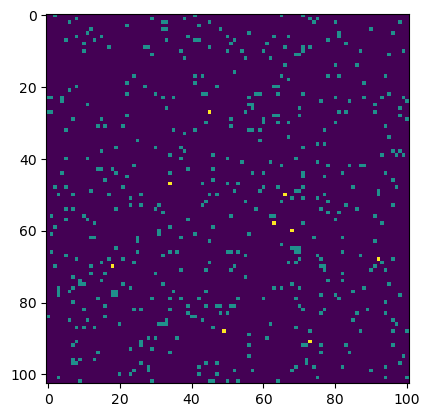

In [44]:
plt.imshow(d2)

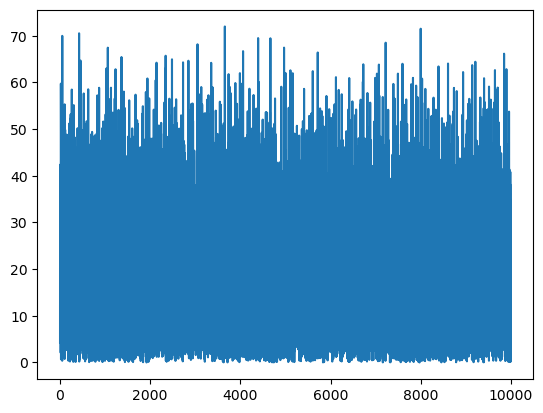

In [75]:
plt.plot(singular_values)

In [71]:
(np.array([[1,2],[3,4]])**2).sum(axis=0)**.5

array([3.16227766, 4.47213595])